In [3]:
# What drives success in crowdfunding campaigns?
# Features: 
# Fraction of goal raised is the label

#Features: 
    
"""
Whether the campaign promises a product	Many crowdfunding campaigns promise to provide actual products in return for early investment. 
Goal amount for campaign	Dollar amount advertised by crowdfunding campaign teams for the targeted investment amount. 
Technology campaign	Whether the campaign is for a technology product.
Small business campaign	Whether the campaign is for a small business
Fixed funding campaign - only raises when goal is met	Founders are only paid the investment dollars if the target goal of the campaign is raised (at least)
Product, if being funded, is an IoT or connected device	Internet of things devices are those that connect to the web or to a phone - e.g., fitbit.

"""

# Binary Features: 
"""
pre_order_perk
tech_campaign
sbiz_campaign
fixed_fund
iot_plus
"""

#Label:

"""

Fraction of goal raised	Fraction of goal investment amount raised in crowdfunding campaign.

"""

#Features not to use

"""
Campaign ID	Notes
Product was delivered	Whether the product was eventually delivered.
Campaign start year	Start year of campaign
State	State of team raising capital

"""

# Potential Combinations/Questions:
# Do high goals result in high fractions raised?
# Do small businesses with small goals do better than large businesses with small goals?
# Do tech campaigns do better?
# All else equal, check predictions on binary goals. 

#

'\nCampaign ID\tNotes\nProduct was delivered\tWhether the product was eventually delivered.\nCampaign start year\tStart year of campaign\nState\tState of team raising capital\n\n'

In [4]:
#RandomForestRegressor
#LinearRegression
#Lasso

In [5]:
# Get all the data from Crowdfunding campaign.csv file
import pandas as pd
crowdfunding_df = pd.read_csv('Crowdfunding campaign.csv',  header=0).drop(columns=['delivery', 'state', 'year_start', 'cid']).dropna()
crowdfunding_df.head()

,pre_order_perk,amt_goal,frac_raised,tech_campaign,sbiz_campaign,fixed_fund,iot_plus
0,0.0,2500.0,0.040000,0.0,1.0,0.0,0.0
1,0.0,1500.0,1.733333,0.0,0.0,0.0,0.0
2,1.0,100000.0,1.007510,1.0,0.0,0.0,0.0
3,1.0,7000.0,0.000000,0.0,1.0,0.0,0.0
4,1.0,2000.0,1.000000,0.0,1.0,0.0,0.0


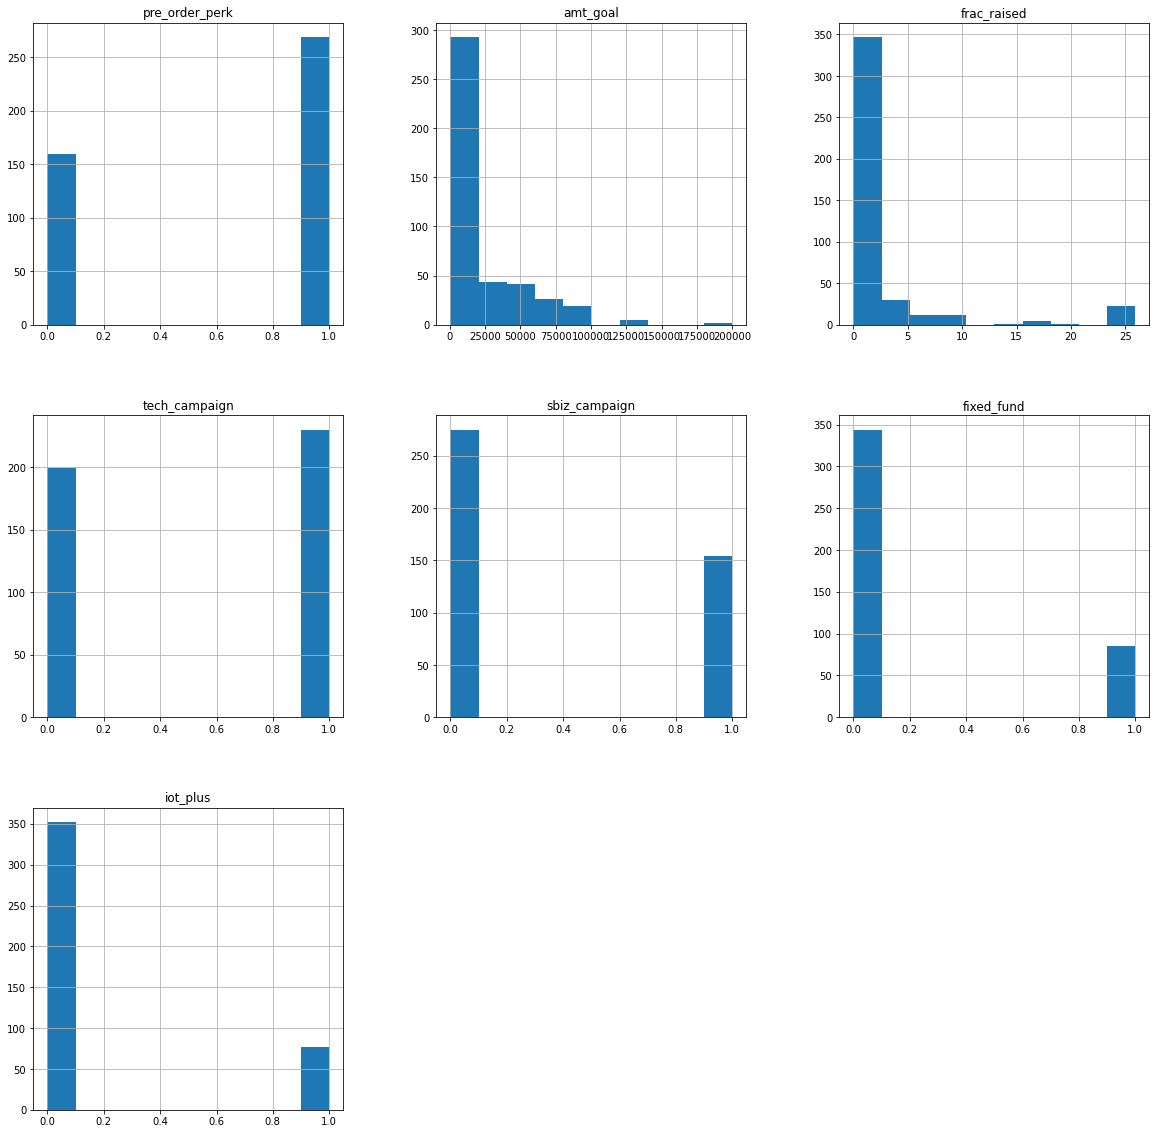

In [6]:
#Understand the data
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

crowdfunding_df.hist(figsize=(20,20))
plt.show()

In [7]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
%matplotlib inline

import statsmodels.api as sm

def check_model_accuracy(models, X_train, X_test, y_train, y_test):
    for model in models.keys():
        # make regression model 
        model = models[model]

        # fit model and print results
        results = model.fit()
        #print(results.summary())

        # Correct for heteroscedasticity
        results_robust = results.get_robustcov_results(cov_type='HC1')
        #print(results_robust.summary())
        
        y_pred = results_robust.predict(X_test)

        print('For Model {}'.format(model))
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

X = crowdfunding_df[['pre_order_perk','amt_goal','tech_campaign','sbiz_campaign','fixed_fund','iot_plus']].dropna()
y = crowdfunding_df['frac_raised'].dropna()

# Split the sample into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


models_to_check = {'OLS': sm.OLS(y_train, X_train)}
check_model_accuracy(models_to_check, X_train, X_test, y_train, y_test)

For Model <statsmodels.regression.linear_model.OLS object at 0x7f642900d150>
Mean Absolute Error: 3.555925975037664
Mean Squared Error: 36.37334875545417
Root Mean Squared Error: 6.031032146776716


In [8]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

perk = [i for i in crowdfunding_df['pre_order_perk']]
goal = [i for i in crowdfunding_df['amt_goal']]
tech = [i for i in crowdfunding_df['tech_campaign']]
sbiz = [i for i in crowdfunding_df['sbiz_campaign']]
fixed = [i for i in crowdfunding_df['fixed_fund']]
iot = [i for i in crowdfunding_df['iot_plus']]

X = [[perk[i], goal[i], tech[i], sbiz[i], fixed[i], iot[i]] for i in range(len(perk))]
y = [i for i in crowdfunding_df['frac_raised']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = linear_model.Lasso(alpha=0.1)

models_to_check = {'Lasso': linear_model.Lasso(alpha=0.1), 
                   'ElasticNet': linear_model.ElasticNet(),
                  'LinearRegression': linear_model.LinearRegression(),
                  'RidgeRegression': linear_model.Ridge(alpha=1.0)}

for model in models_to_check.keys():
    clf = models_to_check[model]
    clf.fit(X_train, y_train)
    predictions = clf.predict([[0,500000,0,0,0,0]])
    print(predictions)

[-7.76267686]
[4.06837848]
[-9.67905471]
[-9.45776622]


In [9]:
# Need matrix of all possible params
matrix = []
for p in [0,1]:
    for g in [1000, 5000, 10000, 25000, 50000, 100000, 200000, 500000]:
        for t in [0,1]:
            for s in [0, 1]:
                for f in [0, 1]:
                    for i in [0, 1]:
                        matrix.append([p, g, t, s, f, i])

# Prints the Fraction Raised for each possible permutation and model
for m in matrix:
    for model in models_to_check.keys():
        clf = models_to_check[model]
        clf.fit(X_train, y_train)
        predictions = clf.predict([m])
        print(predictions)


[0.96707694]
[2.62397802]
[0.10017404]
[0.20346286]
[2.8033894]
[2.63338048]
[2.48915301]
[2.55409255]
[0.93528629]
[2.62397802]
[-0.44739421]
[-0.34264163]
[2.77159876]
[2.63338048]
[1.94158476]
[2.00798805]
[0.96707694]
[2.62397802]
[0.926477]
[0.93163241]
[2.8033894]
[2.63338048]
[3.31545597]
[3.28226209]
[0.93528629]
[2.62397802]
[0.37890875]
[0.38552791]
[2.77159876]
[2.63338048]
[2.76788772]
[2.73615759]
[2.21746134]
[2.82439391]
[2.04549655]
[2.06891499]
[4.05377381]
[2.83379637]
[4.43447552]
[4.41954468]
[2.1856707]
[2.82439391]
[1.4979283]
[1.52281049]
[4.02198317]
[2.83379637]
[3.88690727]
[3.87344018]
[2.21746134]
[2.82439391]
[2.87179952]
[2.79708453]
[4.05377381]
[2.83379637]
[5.26077849]
[5.14771422]
[2.1856707]
[2.82439391]
[2.32423126]
[2.25098004]
[4.02198317]
[2.83379637]
[4.71321023]
[4.60160972]
[0.89709895]
[2.63555638]
[0.02178343]
[0.12601814]
[2.73341142]
[2.64495884]
[2.4107624]
[2.47664783]
[0.86530831]
[2.63555638]
[-0.52578482]
[-0.42008635]
[2.70162077]
[2.

In [15]:
# placeholder variables, will be updated
permutation = [0,0,0,0,0,0]
max_perm = [0]
model_type = ""

# Checks Each Permutation and each Model. Returns the permutation, and model that returned the highest Frac Raised
for m in matrix:
    for model in models_to_check.keys():
        clf = models_to_check[model]
        clf.fit(X_train, y_train)
        predictions = clf.predict([m])
        if predictions > max_perm:
            model_type = model
            max_perm = predictions
            permutation = m

print(permutation)
print(max_perm)
print(model_type)

# Interpretation of results below
"""
[1, 1000, 1, 1, 0, 1] = Best Permutation

Pre Order Perk = Yes
Ideal Goal Amt = $1000
Tech Campaign = Yes
Small Business Campaign = Yes
Fixed Fund = No
Internet of Things Device/Product = Yes
"""

[1, 1000, 1, 1, 0, 1]
[7.92952159]
LinearRegression


'\n[1, 1000, 1, 1, 0, 1] = Best Permutation\n\nPre Order Perk = Yes\nIdeal Goal Amt = $1000\nTech Campaign = Yes\nSmall Business Campaign = Yes\nFixed Fund = No\nInternet of Things Device/Product = Yes\n'

In [23]:
# Using Just Lasso
l_permutation = [0,0,0,0,0,0]
l_max_perm = [0]

# Checks Each Permutation and with Lasso Model
for m in matrix:
    models_to_check['Lasso'].fit(X_train, y_train)
    predictions = models_to_check['Lasso'].predict([m])
    if predictions > l_max_perm:
        l_max_perm = predictions
        l_permutation = m

# Best Lasso Permutation

print(l_permutation)
print(l_max_perm)

[1, 1000, 1, 0, 0, 1]
[6.33550305]
